In [1]:
!nvidia-smi

Wed Dec 14 11:06:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!wget https://raw.githubusercontent.com/nish16111/DeepLearning_TensorFlow/main/reused_functions.py

--2022-12-14 11:06:36--  https://raw.githubusercontent.com/nish16111/DeepLearning_TensorFlow/main/reused_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8655 (8.5K) [text/plain]
Saving to: ‘reused_functions.py’

reused_functions.py 100%[===================>]   8.45K  --.-KB/s    in 0s      

2022-12-14 11:06:36 (84.8 MB/s) - ‘reused_functions.py’ saved [8655/8655]



In [3]:
from reused_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-12-14 11:06:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.253.62.128, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   205MB/s    in 0.8s    

2022-12-14 11:06:40 (205 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [6]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test

In [7]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# IMAGE_SHAPE  = (224, 224)
# BATCH_SIZE = 32


# train_datagen = ImageDataGenerator(rescale= 1/255.)
# test_datagen = ImageDataGenerator(rescale = 1/255.)

In [10]:
# print("Training Data")

# train_data = train_datagen.flow_from_directory(train_dir,
#                                                target_size = IMAGE_SHAPE,
#                                                batch_size = BATCH_SIZE,
#                                                class_mode = "categorical")

# print("Test Data")

# test_data = test_datagen.flow_from_directory(test_dir,
#                                              target_size = IMAGE_SHAPE,
#                                              batch_size = BATCH_SIZE,
#                                              class_mode = "categorical")


In [11]:
# Creating datafiles using data_set_from_directory method.

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size = BATCH_SIZE)


test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [12]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [13]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [14]:
 for images, labels in train_data_10_percent.take(1):
   print(images, labels)

tf.Tensor(
[[[[7.53571396e+01 4.48163261e+01 2.33571434e+01]
   [5.78316307e+01 3.45459175e+01 2.02397957e+01]
   [4.27857132e+01 2.81530609e+01 2.30765305e+01]
   ...
   [2.27928543e+02 1.95989761e+02 7.48368530e+01]
   [2.24928558e+02 1.92260193e+02 8.48826981e+01]
   [2.23969406e+02 1.89612228e+02 9.36837692e+01]]

  [[9.00969391e+01 5.58571434e+01 2.87602024e+01]
   [7.01377563e+01 4.20051003e+01 2.11377544e+01]
   [5.05867310e+01 3.14285717e+01 2.15153065e+01]
   ...
   [2.24729614e+02 1.92872452e+02 8.05001068e+01]
   [2.24739716e+02 1.91800964e+02 8.70918274e+01]
   [2.10882477e+02 1.78525299e+02 8.02396545e+01]]

  [[9.23418350e+01 5.32653046e+01 2.01122437e+01]
   [8.48826523e+01 5.29846954e+01 2.48112259e+01]
   [6.50663223e+01 3.84489784e+01 2.17091846e+01]
   ...
   [2.18030502e+02 1.85479507e+02 8.55050049e+01]
   [2.06076538e+02 1.74719391e+02 7.39030609e+01]
   [2.10418533e+02 1.81418533e+02 7.92654495e+01]]

  ...

  [[2.27418427e+02 2.09418427e+02 8.49898987e+01]
   [2

**Functional Api (Feature Extraction)**

In [15]:
# 1 Create a basemodel with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

# 2. Freeze the base model
base_model.trainable = False

# 3 create inputs into our model
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name= "Input_layer")

# 4 if using resnet 50v2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# 5. pass the inputs to the base model
x = base_model(inputs)
print(f"Shape after passing inputs through base model : {x.shape}")

# 6. Average pool the outputs of the base model (segregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after global average pooling 2D: {x.shape}")

# 7. create the o/p activation layer
outputs = tf.keras.layers.Dense(10, activation = "softmax", name= "output_layer")(x)

# 8 Combine inputs with the outputs into model
model_0 = tf.keras.Model(inputs, outputs)


16705208/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model : (None, 7, 7, 1280)
Shape after global average pooling 2D: (None, 1280)


In [16]:
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [17]:
history_0 = model_0.fit(train_data_10_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                 experiment_name = "10_percent_feature_extraction")])

saving TensorBoard log files to : transfer_learning/10_percent_feature_extraction/20221214-110654
Epoch 1/5
24/24 [==============================] - 20s 257ms/step - loss: 1.8760 - accuracy: 0.4200 - val_loss: 1.2737 - val_accuracy: 0.7434
Epoch 2/5
24/24 [==============================] - 5s 186ms/step - loss: 1.0725 - accuracy: 0.7747 - val_loss: 0.8523 - val_accuracy: 0.8224
Epoch 3/5
24/24 [==============================] - 4s 153ms/step - loss: 0.7833 - accuracy: 0.8347 - val_loss: 0.6603 - val_accuracy: 0.8734
Epoch 4/5
24/24 [==============================] - 4s 154ms/step - loss: 0.6294 - accuracy: 0.8667 - val_loss: 0.5774 - val_accuracy: 0.8734
Epoch 5/5
24/24 [==============================] - 4s 156ms/step - loss: 0.5362 - accuracy: 0.8827 - val_loss: 0.5191 - val_accuracy: 0.8882


In [18]:
# 1 Create a basemodel with tf.keras.applications
# 2. Freeze the base model
# 3 create inputs into our model
# 4 if using resnet 50v2 you will need to normalize inputs
# 5. pass the inputs to the base model
# 6. Average pool the outputs of the base model (segregate all the most important information, reduce number of computations)
# 7. create the o/p activation layer
# 8 Combine inputs with the outputs into. model

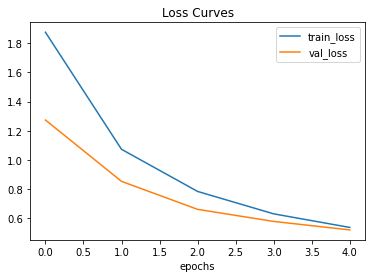

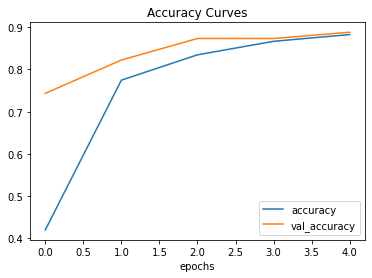

In [19]:
plot_loss_curves(history_0)

In [20]:
# Evaluate on the full test data set

model_0.evaluate(test_data)

79/79 [==============================] - 7s 78ms/step - loss: 0.5539 - accuracy: 0.8664


[0.5538755655288696, 0.8664000034332275]

In [21]:
# Check the layers in our base model

for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 tf.math.truediv
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [22]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [23]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


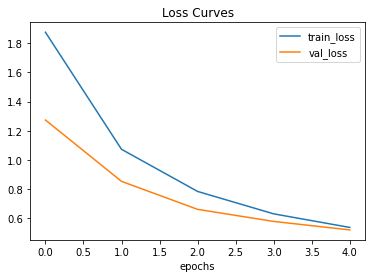

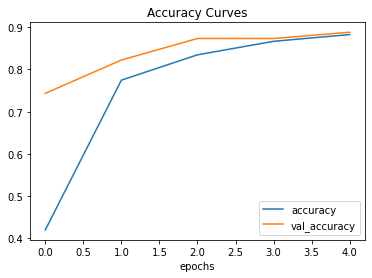

In [24]:
plot_loss_curves(history_0)

**Global average Pooling 2D layer**

In [25]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: \n {input_tensor}\n")


global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(f"Shape of input_tensor before pooling:\n {input_tensor.shape}")
print(f"Shape of input_tensor after pooling:\n{global_average_pooled_tensor.shape}")
print(f"The tensor after pooling:\n{global_average_pooled_tensor}")


Random input tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

Shape of input_tensor before pooling:
 (1, 4, 4, 3)
Shape of input_tensor after pooling:
(1, 3)
The tensor after pooling:
[[-0.09368646 -0.45840448 -0.2885598 ]]


In [26]:
# Replicating global average pooling layer

tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [27]:
# Download and uznip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip


--2022-12-14 11:07:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   175MB/s    in 0.7s    

2022-12-14 11:07:54 (175 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [28]:
unzip_data("10_food_classes_1_percent.zip")

In [29]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [30]:
IMAGE_SIZE  = (224, 224)
BATCH_SIZE = 32


print("Train_data_1_Percent")
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           image_size = IMAGE_SIZE,
                                                                           batch_size = BATCH_SIZE,
                                                                           label_mode = "categorical")

print("Test_Data")
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMAGE_SIZE,
                                                                batch_size = BATCH_SIZE)

Train_data_1_Percent
Found 70 files belonging to 10 classes.
Test_Data
Found 2500 files belonging to 10 classes.


In [31]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'

In [32]:
# Adding augmentation right into the model

print(tf.__version__)

2.9.2


In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescale(1./255) #Resnetv2 
], name = "data_augmentation")

**Note** Preprocessing layers augment the data using the GPU.

Visualize data augmentation layer

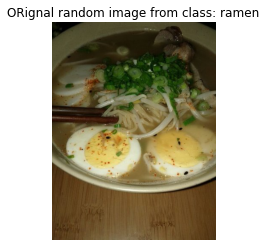

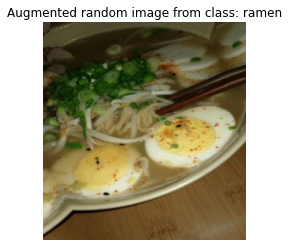

In [34]:
# View a random image and compare it to its augmented version.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# Read and plot in the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"ORignal random image from class: {target_class}")
plt.axis(False);

# Plot the augmented image
augmented_img = data_augmentation(tf.expand_dims(img, axis = 0), training = True)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);


In [35]:
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image


target_class, target_dir, random_image, random_image_path

('sushi',
 '10_food_classes_1_percent/train/sushi',
 '300722.jpg',
 '10_food_classes_1_percent/train/sushi/300722.jpg')

In [36]:
# 1 Create a basemodel with tf.keras.applications
# 2. Freeze the base model
# 3 create inputs into our model
# 4 if using resnet 50v2 you will need to normalize inputs
# 5. pass the inputs to the base model
# 6. Average pool the outputs of the base model (segregate all the most important information, reduce number of computations)
# 7. create the o/p activation layer
# 8 Combine inputs with the outputs into. model

## Model 1 Feature extraction Transfer Learning with 1 Percent data

In [37]:
# Setup the input shape and base_model, freeziing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create the input layer
inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model the inputs (after augmentation) and don't train it
x = base_model(x, training = False)

# Pool the output feature of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="Pooling_layer")(x)

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

# Make a model using the inputs and outputs
model_1 = tf.keras.Model(inputs, outputs)


In [38]:
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [39]:
history_1_percent = model_1.fit(train_data_1_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_1_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)),
                        # Track model training logs
                        callbacks =[create_tensorboard_callback(dir_name = "transfer_learning",
                                                                experiment_name = "1_percent_data_aug")])


saving TensorBoard log files to : transfer_learning/1_percent_data_aug/20221214-110759
Epoch 1/5
3/3 [==============================] - 18s 5s/step - loss: 2.3981 - accuracy: 0.1143 - val_loss: 2.2498 - val_accuracy: 0.1530
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1587 - accuracy: 0.2286 - val_loss: 2.1152 - val_accuracy: 0.2319
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9340 - accuracy: 0.4286 - val_loss: 1.9820 - val_accuracy: 0.3092
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.7844 - accuracy: 0.5000 - val_loss: 1.8844 - val_accuracy: 0.3964
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.5913 - accuracy: 0.6143 - val_loss: 1.7971 - val_accuracy: 0.4391


In [40]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [41]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 10s 113ms/step - loss: 1.7965 - accuracy: 0.4588


[1.796506643295288, 0.45879998803138733]

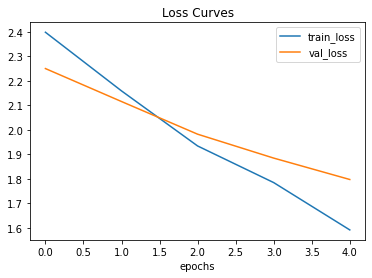

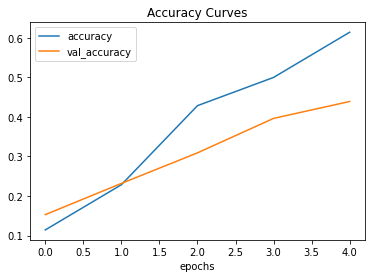

In [42]:
plot_loss_curves(history_1_percent)

In [43]:
# 1. Setup the input shape and base_model, freeziing the base model layers
# 2. Create the input layer
# 3. Add in data augmentation Sequential model as a layer
# 4. Give base_model the inputs (after augmentation) and don't train it
# 5. Pool the output feature of the base model
# 6. Put a dense layer on as the output
# 7. Make a model using the inputs and outputs

In [44]:
train_data_10_percent_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [45]:
# Set the data inputs
IMAGE_SIZE  = (224, 224)
BATCH_SiZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_data_10_percent_dir,
                                                                            label_mode = "categorical",
                                                                            batch_size = BATCH_SIZE,
                                                                            image_size = IMAGE_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size = BATCH_SIZE,
                                                                label_mode = "categorical",
                                                                image_size = IMAGE_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [46]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test

In [47]:
# Create the data augmentation layer using Sequential.
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2)
    # preprocessing.Rescaling(1./255) #EfficientNet architecture has built-in normalization, use this when working with resnet architecture
], name = "data_augmentation")

In [48]:
# Setup the input shape
input_shape = (224, 224, 3)

# Create a frozen base model(bacbone)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create the input layer (including the layers b/w)
x = tf.keras.layers.Input(shape = input_shape, name = "input_layer")

# augment our training images (augmentation deos not occur on test data)
x = data_augmentation(inputs)

# pass the augmented images to the base model but keep the base model in,
# inference mode this also ensures batchnorm layers don't get updated
x = base_model(x, training = False)

# Pooling (Converting into a feature vectors)
x = tf.keras.layers.GlobalAvgPool2D(name = "pooling_layer")(x)

# Output layer
outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

# create model with inputs and outputs
model_2 = tf.keras.Model(inputs, outputs)

In [49]:
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [50]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_2 (Normalization  (None, None, None,   7          ['rescaling_2[0][0]']            
 )                              3)                                                   

### Creating Model CheckPoint (can save weights or whole model)

In [51]:
# Set checkpoint path
checkpoint_path = "10_perecent_model_checkpoints_weights/checkpoint.ckpt"

# Create a model checkpoint callback that saves the weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq = "epoch",
                                                         verbose = 1) # save every epoch

## Fit the Model saving checkpoints every epoch

In [52]:
history_2 = model_2.fit(train_data_10_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                 experiment_name = "10_percent_data_aug"),
                                     checkpoint_callback])

saving TensorBoard log files to : transfer_learning/10_percent_data_aug/20221214-110857
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9563 - accuracy: 0.3733
Epoch 1: saving model to 10_perecent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 19s 548ms/step - loss: 1.9563 - accuracy: 0.3733 - val_loss: 1.4036 - val_accuracy: 0.7089
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2844 - accuracy: 0.6973
Epoch 2: saving model to 10_perecent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 456ms/step - loss: 1.2844 - accuracy: 0.6973 - val_loss: 0.9878 - val_accuracy: 0.7993
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9643 - accuracy: 0.7827
Epoch 3: saving model to 10_perecent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 13s 509ms/step - loss: 0.9643 - accuracy: 0.7827 - val_loss: 0.7766 - val_accuracy: 0.8322


In [53]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 73ms/step - loss: 0.5539 - accuracy: 0.8664


[0.5538758635520935, 0.8664000034332275]

In [54]:
# Check model_2 results on all test_data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 73ms/step - loss: 0.6140 - accuracy: 0.8420


[0.6139540076255798, 0.8420000076293945]

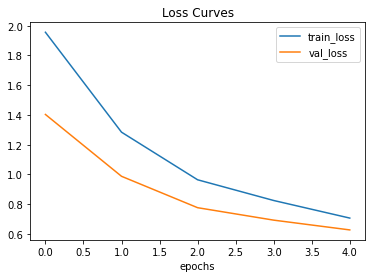

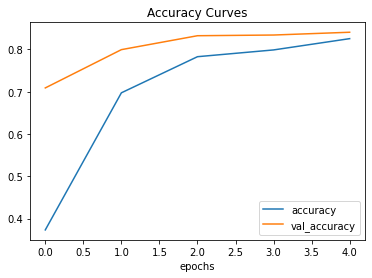

In [55]:
plot_loss_curves(history_2)

### Loading in checkpoint weights
Loading in checkpointed weights returns a model to a specific checkpoint

In [56]:
# Load in saved model_weights and evaluate the model
model_2.load_weights(checkpoint_path)

In [57]:
# Evaluate the model.
loaded_weights_model_results = model_2.evaluate(test_data) #Gives [loss, accuracy as the o/p].

79/79 [==============================] - 6s 73ms/step - loss: 0.6140 - accuracy: 0.8420


In [58]:
results_10_percent_data_aug == loaded_weights_model_results

False

In [59]:
# To check wether the results are same within a tolerance limit (Do it when the results differ after some decimal points)


import numpy as np
np.isclose(np.array(loaded_weights_model_results), np.array(results_10_percent_data_aug))

array([ True,  True])

In [60]:
# Check the difference b/w results.
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[-5.96046448e-08  0.00000000e+00]


In [61]:
# model_3 10 perecent train data
# same data aug
# Fine tuning top 10 unfrozen layers and with top layer trained on custom data


## Model_3 Finetuning an existing model on 10 Percent data
**Note:** Fine_tuning ususally works best after training a feature extraction model for a few epochs with large amounts of custom data

In [62]:
# layers in our loaded model
model_2.layers

In [63]:
# Check whether these layers are trainable.
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fdbc9db5ee0> True
<keras.engine.sequential.Sequential object at 0x7fdbc9722670> True
<keras.engine.functional.Functional object at 0x7fdbc9d96c40> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7fdc44b1ed00> True
<keras.layers.core.dense.Dense object at 0x7fdbc9efdf70> True


In [64]:
# What layers are in our base_model (EfficientNetB0) and are they trainable?
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 tf.math.truediv_2 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [65]:
# How many trainable variables are there in our model
print(len(model_2.layers[2].trainable_variables))

0


In [66]:
# unfreeze last ten layers
base_model.trainable  = True

# Freeze all layers except last ten
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to recompile our models everytime we make a change)
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001), # When fine tuning lower the lr by 10x.
                metrics = ["accuracy"])



/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Note** when using fine tuning lower ur lr by some factor (ideally 10x)

In [67]:
# Check which layers are tunable (trainable)
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 tf.math.truediv_2 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [68]:
# Check the number of trainable variables
print(len(model_2.trainable_variables))

12


In [69]:
# Fine tune for another 5 epochs
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5 

# refit The model (same as model_2 except with more trainable layers)

history_fine_tune = model_2.fit(train_data_10_percent,
                                epochs = fine_tune_epochs,
                                steps_per_epoch = len(train_data_10_percent),
                                validation_data = test_data,
                                validation_steps = int(0.25 * len(test_data)),
                                initial_epoch = history_2.epoch[-1], #start training from previous last epoch
                                callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                         experiment_name = "10_percent_fine_tune_last_10")])


saving TensorBoard log files to : transfer_learning/10_percent_fine_tune_last_10/20221214-111055
Epoch 5/10
24/24 [==============================] - 18s 448ms/step - loss: 0.5979 - accuracy: 0.8267 - val_loss: 0.4842 - val_accuracy: 0.8520
Epoch 6/10
24/24 [==============================] - 10s 423ms/step - loss: 0.4842 - accuracy: 0.8587 - val_loss: 0.4573 - val_accuracy: 0.8421
Epoch 7/10
24/24 [==============================] - 9s 380ms/step - loss: 0.4190 - accuracy: 0.8747 - val_loss: 0.4331 - val_accuracy: 0.8618
Epoch 8/10
24/24 [==============================] - 8s 334ms/step - loss: 0.3684 - accuracy: 0.8987 - val_loss: 0.3956 - val_accuracy: 0.8717
Epoch 9/10
24/24 [==============================] - 8s 332ms/step - loss: 0.3374 - accuracy: 0.8960 - val_loss: 0.4281 - val_accuracy: 0.8602
Epoch 10/10
24/24 [==============================] - 11s 430ms/step - loss: 0.3011 - accuracy: 0.9200 - val_loss: 0.4173 - val_accuracy: 0.8684


In [70]:
# Evaluate the fine_tuned model_3 (which is model_2 fine-tuned for another 5 epochs)
results_fine_tune_10_percent = model_2.evaluate(test_data)
results_fine_tune_10_percent

79/79 [==============================] - 9s 106ms/step - loss: 0.4060 - accuracy: 0.8620


[0.4059956669807434, 0.8619999885559082]

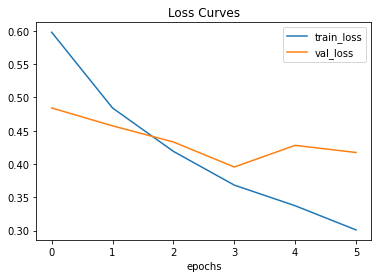

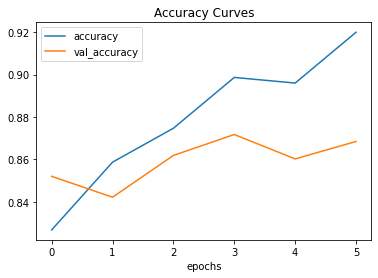

In [71]:
plot_loss_curves(history_fine_tune)

In [72]:
# # Create a function to compare histories.
# import matplotlib.pyplot as plt

# def compare_histories(orignal_history, new_history, initial_epochs = 5):
#   """
#   Comapre two Tensorflow history objects.

#   orignal_history = pre-FineTuning 

#   new_history = post-FineTuning 

#   initial_epochs = the no. of epoch at which the fineTuning staarted
#   """
#   # Get orignal history measurements.

#   acc = orignal_history.history["accuracy"]
#   loss = orignal_history.history["loss"]

#   val_acc = orignal_history.history["val_accuracy"]
#   val_loss = orignal_history.history["val_loss"]

#   # Combine orignal history

#   total_acc = acc + new_history.history["accuracy"]
#   total_loss = loss + new_history.history["loss"]

#   total_val_acc = val_acc + new_history.history["val_accuracy"]
#   total_val_loss = val_loss + new_history.history["val_loss"]

#   # Make plots
#   plt.figure(figsize = (8, 8))
#   plt.subplot(2, 1, 1)
#   plt.plot(total_acc, label = "Training Accuracy")
#   plt.plot(total_val_acc, label = "Val_accuracy")
#   plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = "Start Fine Tuning")
#   plt.legend(loc = "lower right")
#   plt.xlabel("epochs")
#   plt.ylabel("accuracy")
#   plt.title("Training and Valdidation Accuracy")

In [73]:
def compare_histories(og_history, new_history, init_epochs = 5):
  """
  Comapre two Tensorflow history objects.

  orignal_history = pre-FineTuning 

  new_history = post-FineTuning 

  initial_epochs = the no. of epoch at which the fineTuning started
  """
  # getting og history measurements
  accuracy = og_history.history["accuracy"]
  loss = og_history.history["loss"]

  val_accuracy = og_history.history["val_accuracy"]
  val_loss = og_history.history["val_loss"]

  # Combine histories
  total_accuracy = accuracy + new_history.history["accuracy"]
  total_val_accuracy = val_accuracy + new_history.history["val_accuracy"]
  total_loss = loss + new_history.history["loss"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Plotting Accuracy Curves
  plt.figure(figsize = (8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_accuracy, label = "Training Accuracy")
  plt.plot(total_val_accuracy, label = "Val Accuracy")
  plt.plot([init_epochs-1, init_epochs-1], plt.ylim(), label = "Start Fine Tuning")
  plt.title("Accuracy Curves")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.legend(loc = "lower right")

  # Plotting loss Curves
  plt.figure(figsize = (8, 8))
  plt.subplot(2, 1, 2) #(row, col, enrty_number)
  plt.plot(total_loss, label = "Training Loss")
  plt.plot(total_val_loss, label = "Val Loss")
  plt.plot([init_epochs-1, init_epochs-1], plt.ylim(), label = "Start Fine Tuning")
  plt.title("Loss Curves")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend(loc= "upper right")

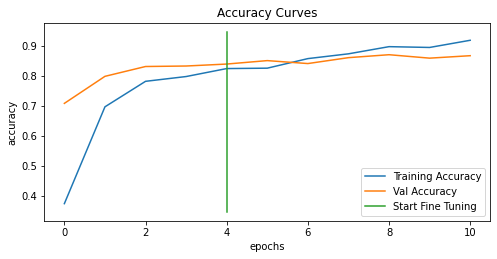

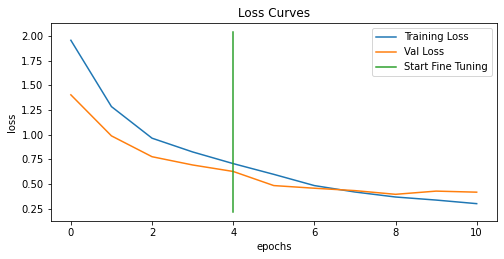

In [74]:
compare_histories(history_2, history_fine_tune)

### Model_4 100% traning data
preprocessing - with data augmentation
fine tuning - included

In [75]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-12-14 11:12:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.217.2.112, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   187MB/s    in 2.7s    

2022-12-14 11:12:26 (187 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [76]:
unzip_data("10_food_classes_all_data.zip")

In [77]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

**Note :** Fine Tuning works best with more amount of data, while feature extratction works best with less amount of data.

In [78]:
# Setup training and test dirs'
train_dir_all_data = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [79]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_100_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                             image_size = IMAGE_SIZE,
                                                                             batch_size = BATCH_SIZE,
                                                                             label_mode = "categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size = IMAGE_SIZE,
                                                                batch_size = BATCH_SIZE,
                                                                label_mode = "categorical")

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [80]:
# Create the augmented data layer (Sequential).
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
])

In [81]:
# Evaluate model 2(this is the fine tuned on 10 percent data)
model_2.evaluate(test_data)

79/79 [==============================] - 8s 89ms/step - loss: 0.4060 - accuracy: 0.8620


[0.405995637178421, 0.8619999885559082]

In [82]:
results_fine_tune_10_percent 

[0.4059956669807434, 0.8619999885559082]

To train a fine-tuning model (model_4) we need to revert model 2 back to its feature extraction weights

In [83]:
# load weights from checkpoints, that way we can fine tune from
# the same stage the 10 percent data model was fine tuned from

model_2.load_weights(checkpoint_path)

In [84]:
# evaluate model_2 now
model_2.evaluate(test_data)

79/79 [==============================] - 8s 90ms/step - loss: 0.6140 - accuracy: 0.8420


[0.6139542460441589, 0.8420000076293945]

**Crux of the Whole Project**
1. Created a base_model (model_0) using feature extraction with 10(percent tarin_data) (EfficientNetB0).
2. Created a model_1 with 1 percent of training_data. (Including feature extraction)
3. Trained a feature extraction transfer learning model for 5 epochs on 10% of the data with data augmentation(model_2) and saved the model's weights using Model Checkpoint callbacks
4. Fine-Tuned the same model on the same 10% data of the data for a further 5 epochs with the top 10 layers of the base model unfrozen
(model_3).
5.Reloaded the model from step 3 to do the same steps as step 4 except this time, going to use all of the data(model_4)


In [86]:
# Check the number of trainable layers.
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 pooling_layer True
4 output_layer True


In [88]:
# check no of trainable layers in efficientNteB0 architecture.
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 tf.math.truediv_2 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [89]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-train

In [92]:
# Compile 
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(0.0001),
                metrics = ["accuracy"])

In [93]:
fine_tune_epochs = initial_epochs + 5

history_fine_tune_all_data = model_2.fit(train_data_100_percent,
                                         epochs = fine_tune_epochs,
                                         steps_per_epoch = len(train_data_100_percent),
                                         validation_data = test_data,
                                         validation_steps = int(0.25 * len(test_data)),
                                         initial_epoch = history_2.epoch[-1],
                                         callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                                  experiment_name = "100_percent_fine_tune")])

saving TensorBoard log files to : transfer_learning/100_percent_fine_tune/20221214-112605
Epoch 5/10
235/235 [==============================] - 67s 255ms/step - loss: 0.6475 - accuracy: 0.7943 - val_loss: 0.3182 - val_accuracy: 0.8931
Epoch 6/10
235/235 [==============================] - 52s 220ms/step - loss: 0.5211 - accuracy: 0.8247 - val_loss: 0.3007 - val_accuracy: 0.8980
Epoch 7/10
235/235 [==============================] - 48s 202ms/step - loss: 0.4589 - accuracy: 0.8527 - val_loss: 0.2830 - val_accuracy: 0.8997
Epoch 8/10
235/235 [==============================] - 54s 227ms/step - loss: 0.4171 - accuracy: 0.8637 - val_loss: 0.2415 - val_accuracy: 0.9079
Epoch 9/10
235/235 [==============================] - 49s 208ms/step - loss: 0.3785 - accuracy: 0.8795 - val_loss: 0.2489 - val_accuracy: 0.9095
Epoch 10/10
235/235 [==============================] - 43s 183ms/step - loss: 0.3525 - accuracy: 0.8888 - val_loss: 0.2275 - val_accuracy: 0.9276


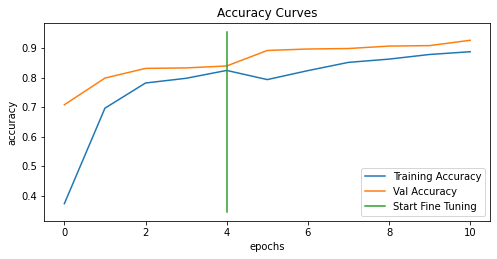

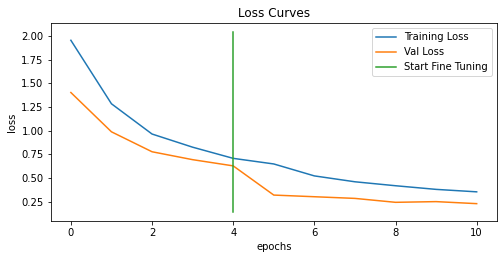

In [95]:
# history_2, 
# history_fine_tune,
# history_fine_tune_all_data
compare_histories(history_2, history_fine_tune_all_data)

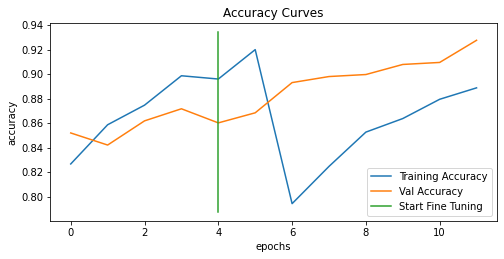

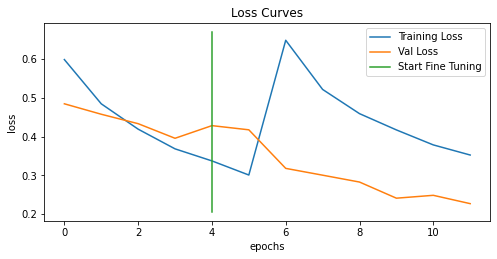

In [96]:
compare_histories(history_fine_tune, history_fine_tune_all_data)

## Viewing our experiment data in tensorboard

In [102]:
# View tensorboard logs of transfer learning modelling experiments
# upload tensorboard dev records

!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments with 10 Food101 classes" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine tuning" \
  --one_shot #Exits the uploader once its finished uploading



***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=ok2LgFmG3D85xcGHcQ5QffEsI8bPRz&prompt=consent&access_type=o

TenorBoard experiments are available at this link: https://tensorboard.dev/experiment/S9d9T1uyT129LNo4Zs0j2A/

In [103]:
!tensorboard dev list

https://tensorboard.dev/experiment/S9d9T1uyT129LNo4Zs0j2A/
	Name                 Transfer Learning Experiments with 10 Food101 classes
	Description          A series of different transfer learning experiments with varying amounts of data and fine tuning
	Id                   S9d9T1uyT129LNo4Zs0j2A
	Created              2022-12-14 11:43:46 (9 minutes ago)
	Updated              2022-12-14 11:43:51 (9 minutes ago)
	Runs                 10
	Tags                 5
	Scalars              162
	Tensor bytes         0
	Binary object bytes  4358390
Total: 1 experiment(s)
